In [158]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [16]:
file_otii = "measurements/otii/mqtt_test0_10min1_nbiot.csv"
data = pd.read_csv(file_otii)

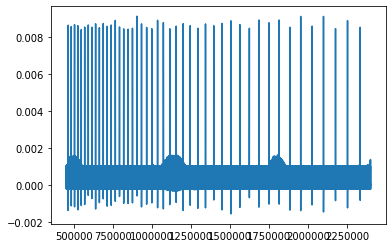

In [167]:
idle_sample = data["Arc Main Current (A)"].iloc[450000:2400000]
idle_sample.plot()

In [168]:
sleep = data["Arc Main Current (A)"].iloc[1400000:1440000]

sleep_mean = sleep.mean()
sleep_std = sleep.std()

filtered = idle_sample.where(idle_sample > (0.004))


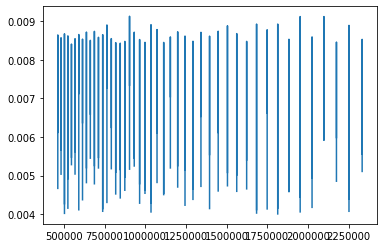

In [169]:
filtered.plot()

In [170]:
spike_times = data["Timestamp (S)"].iloc[450000:2400000][filtered.isnull()]

In [171]:
np_values = spike_times.where(spike_times.diff() > 0.001).values

In [172]:
nan_vals = np.isnan(np_values)
not_nan = ~nan_vals
np_values = np_values[not_nan]
np_values

array([115.67725, 120.67625, 125.92525, 131.175  , 136.6745 , 142.1745 ,
       147.92425, 153.67425, 159.67425, 165.674  , 171.92375, 178.1735 ,
       184.6735 , 191.17325, 197.92325, 204.673  , 211.67275, 218.6725 ,
       225.92225, 233.17125, 241.421  , 249.6705 , 258.9205 , 268.17025,
       278.42   , 288.66925, 299.91925, 311.169  , 323.4185 , 335.66825,
       348.9175 , 362.16725, 376.417  , 390.6665 , 405.916  , 421.1645 ,
       437.414  , 453.6635 , 470.913  , 488.1625 , 506.41175, 524.66125,
       543.9105 , 563.16025, 583.40925])

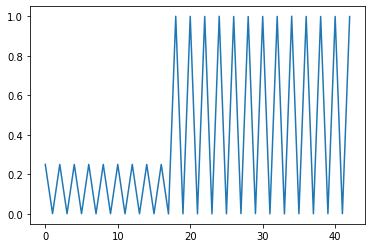

In [173]:
diffs = np.diff(np_values)
plt.plot(np.diff(diffs))

In [214]:
interval = 10
max_data = 1440

current = 0

total_coap = 0

for i in range(int(max_data/interval)):
    current+=5
    #print(current)
    total_coap+=current
    
print(total_coap*2/1000)

104.4


In [215]:
interval = 10
max_data = 3000

current = 0

total_mqtt = 0

for i in range(int(max_data/interval)):
    current+=5
    total_mqtt+=current
    
print(total_mqtt*2/1000)

451.5


In [217]:
(total_coap+total_mqtt)*2/1000

555.9